In [44]:
import cv2
from matplotlib import pyplot as plt
import imutils
import base64
import numpy as np
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

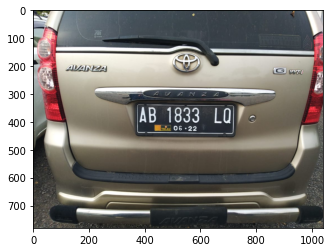

In [45]:
img = cv2.imread(r'dataset/AB1833LQ.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

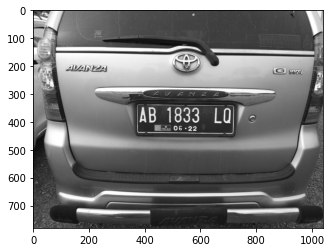

In [46]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [47]:
# blur = cv2.bilateralFilter(gray, 9, 75, 75)
# plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

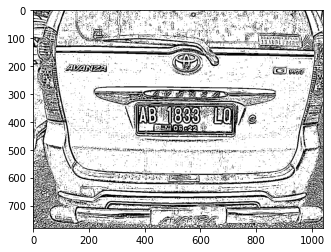

In [48]:
th = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
plt.imshow(cv2.cvtColor(th, cv2.COLOR_BGR2RGB))

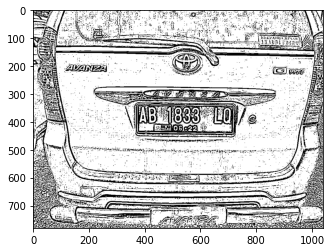

In [49]:
blur = cv2.bilateralFilter(th, 9, 75, 75)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

In [50]:
imgcnt = th.copy()

cnt = cv2.findContours(imgcnt,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = imutils.grab_contours(cnt)
cnt = sorted(cnt,key=cv2.contourArea,reverse = True)[:10]

# detected = None
screencnt = None
for c in cnt:
    
    peri = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,0.02*peri,True)
    #if there are four DP 
    if len(approx) == 4:
        screencnt = approx
            #detected == 1
        break

#masking other part
mask = np.zeros(gray.shape,np.uint8)

In [51]:
print (screencnt)

[[[935 569]]

 [[595 589]]

 [[594 616]]

 [[840 612]]]


In [58]:
try:
    new_image = cv2.drawContours(mask,[screencnt],0,255,-1)
    new_image = cv2.bitwise_and(img,img,mask=mask)
    #cropping process
    (x,y) = np.where(mask ==255)
    (topx,topy) = (np.min(x),np.min(y))
    (bottomx,bottomy) = (np.max(x),np.max(y))
    cropped = gray[topx:bottomx+1, topy:bottomy+1]
    blur = cv2.GaussianBlur(new_image,(5,5),0)
    ret,th = cv2.threshold(blur,127,255,cv2.THRESH_BINARY_INV)
    text = pytesseract.image_to_string(th,config='--psm 9')
    
except:
    pass
    #  print('no detected contour')


In [59]:
cv2.imshow('app', th)
cv2.waitKey(0)
cv2.destroyAllWindows()

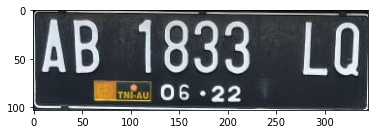

In [54]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [56]:
print (pytesseract.image_to_string(new_image,config='--psm 9'))

AB 1833 LO



In [42]:
img = cv2.cvtColor(th, cv2.COLOR_BGR2RGB)
hImg, wImg,_ = img.shape
boxes = pytesseract.image_to_boxes(img,config='--psm 9')
for b in boxes.splitlines():
    b = b.split(' ')
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(img, (x,hImg- y), (w,hImg- h), (50, 50, 255), 2)
    cv2.putText(img,b[0],(x,hImg- y+25),cv2.FONT_HERSHEY_SIMPLEX,1,(50,50,255),2)

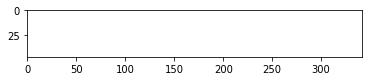

In [43]:
plt.imshow(img)

In [57]:
new_image = cv2.imread(r'dataset\result\0AB1833LQ.jpg')